# Justin Elkinson

## Assignment 7:
### Car Loan Default Prediction

#### Team Members: Cam and Eric


### Dataset:

We found our dataset on Kaggle. I was going to use this data set for predictive modeling in my AA 490 Capstone; however, our project plan changed. Here is a link to the data set:
###### https://www.kaggle.com/matthieu64/car-loan-default-prediction/notebook


#### About the variables:

This dataset has 233,154 observations, each with 31 columns (including a binary default column in the train set). The target variable will be default (whether or not the loan defaulted), and the input varibles we will use consist of almost all variables in the dataset.

In [31]:
import pandas as pd
import numpy as np

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

import warnings; warnings.simplefilter('ignore')

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
df = pd.read_csv('car loan train.csv')

In [35]:
df.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [36]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [37]:
#INPUT VARIABLES:
X = df.loc[:,['disbursed_amount','asset_cost','ltv','Employment.Type',
            'MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag','PERFORM_CNS.SCORE',
              'PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT',
              'PRI.DISBURSED.AMOUNT','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS','SEC.OVERDUE.ACCTS',
              'SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT',
              'NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
              'NO.OF_INQUIRIES']]

#TARGET VARIABLES
y = df['loan_default']








In [38]:
df['Employment.Type'].value_counts()

df['Employment.Type'].describe()

count            225493
unique                2
top       Self employed
freq             127635
Name: Employment.Type, dtype: object

In [39]:
#Fix Null Values

X["Employment.Type"] = X["Employment.Type"].fillna("N/A")

In [40]:
# Change to categorical variable
X['Employment.Type'] = X['Employment.Type'].astype(object)

# Encode categorical variable
X = pd.get_dummies(X)


In [41]:
#Fix Null Values

X["SEC.NO.OF.ACCTS"] = X["SEC.NO.OF.ACCTS"].fillna(0)

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [43]:
X.isnull().any()

disbursed_amount                       False
asset_cost                             False
ltv                                    False
MobileNo_Avl_Flag                      False
Aadhar_flag                            False
PAN_flag                               False
VoterID_flag                           False
Driving_flag                           False
Passport_flag                          False
PERFORM_CNS.SCORE                      False
PRI.NO.OF.ACCTS                        False
PRI.ACTIVE.ACCTS                       False
PRI.OVERDUE.ACCTS                      False
PRI.CURRENT.BALANCE                    False
PRI.SANCTIONED.AMOUNT                  False
PRI.DISBURSED.AMOUNT                   False
SEC.NO.OF.ACCTS                        False
SEC.ACTIVE.ACCTS                       False
SEC.OVERDUE.ACCTS                      False
SEC.OVERDUE.ACCTS                      False
SEC.CURRENT.BALANCE                    False
SEC.SANCTIONED.AMOUNT                  False
SEC.DISBUR

##### Decision Tree:

__________________________________________________________________________________________________________________________________________________________________________________________

In [14]:
# Create a decision tree and train
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Training Accuracy: 0.994638730880374
Testing Accuracy: 0.6725783277219017


##### Decision Tree Tuning:

In [15]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'max_depth': range(1,10), 'criterion':['gini', 'entropy']}

# Create a list of trees
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Best parameters are: {'criterion': 'gini', 'max_depth': 1}
Training Accuracy: 0.7823217512049452
Testing Accuracy: 0.7853573802835024


##### Adaboost:

In [16]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Training Accuracy: 0.782166274400476
Testing Accuracy: 0.7854646050910339


##### Adaboost Tuning:

In [17]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'n_estimators': np.arange(5,10, 2), 'learning_rate':np.linspace(0.001,3,4)}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(AdaBoostClassifier(), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Best parameters are: {'learning_rate': 0.001, 'n_estimators': 5}
Training Accuracy: 0.7823217512049452
Testing Accuracy: 0.7853573802835024


##### Gradient Boosting:

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Training Accuracy: 0.7825898146609266
Testing Accuracy: 0.7855503849370591


##### Gradient Boosting Tuning:

In [20]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'n_estimators': np.arange(5,10, 2), 'learning_rate':np.linspace(0.001,3,4)}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Best parameters are: {'learning_rate': 0.001, 'n_estimators': 5}
Training Accuracy: 0.7823217512049452
Testing Accuracy: 0.7853573802835024


##### Random Forest:

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Training Accuracy: 0.9672104780643674
Testing Accuracy: 0.7539190667152752


##### Random Forest Tuning

In [45]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'n_estimators': np.arange(5,10, 2), 'max_features':np.arange(3,4)}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Best parameters are: {'max_features': 3, 'n_estimators': 9}
Training Accuracy: 0.9751880465143709
Testing Accuracy: 0.7427033518474835


## KNN:

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Training Accuracy: 0.8062169276711183
Testing Accuracy: 0.7433467006926723


## KNN Tuning:

In [ ]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'n_neighbors': np.arange(5,10, 2)}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

##### ElasticNet:

In [48]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log', penalty='elasticnet', alpha=1, l1_ratio=.1)

model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Training Accuracy: 0.7313682494920197
Testing Accuracy: 0.7279921082541657


##### ElasticNet Tuning:

In [ ]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'alpha':np.linspace(0.1,3, 4), 'l1_ratio':np.linspace(0,1,10)}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(SGDClassifier(loss='log', penalty='elasticnet'), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

##### Logistic Regression:

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Training Accuracy: 0.7832009993405639
Testing Accuracy: 0.7818404065964701


## Chart:

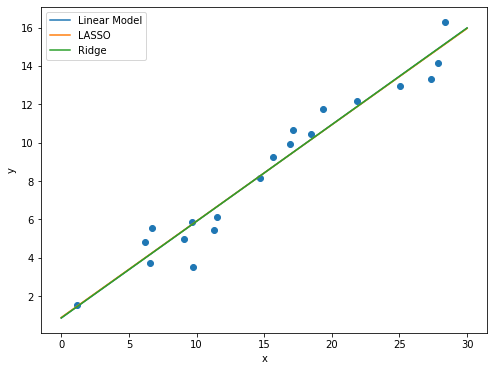

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge

# Create a dataset
x = 30 * np.random.random((20, 1))
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# Set alpha
alpha = 0.1

######## LASSO
model1 = linear_model.Lasso(alpha=alpha)
model1.fit(x, y)
# predict y from the data
y_new1 = model1.predict(x_new[:, np.newaxis])

######## RIDGE
model2 = Ridge(alpha=alpha)
model2.fit(x, y)
# predict y from the data
y_new2 = model2.predict(x_new[:, np.newaxis])


# plot the results
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)
ax.plot(x_new, y_new1)
ax.plot(x_new, y_new2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('tight')

plt.legend(['Linear Model', 'LASSO', 'Ridge'], loc='upper left')

plt.show()

In [51]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log', penalty='elasticnet', alpha=1, l1_ratio=.1)

model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

Training Accuracy: 0.6970507658572938
Testing Accuracy: 0.6946666380733847


In [ ]:
# Decide what hyperparameter to tune then decide the searching range
param_grid = {'alpha':np.linspace(0.1,1,5), 'l1_ratio':np.linspace(0,1,5)}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(SGDClassifier(loss='log', penalty='elasticnet'), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


# Create a decision tree and train
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.9818120163445242
Rsquared on Testing -0.9390236324994279


In [59]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(x_train, y_train)

print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.014731263586424292
Rsquared on Testing 0.0171520753305352


In [ ]:
param_grid = {'alpha':np.linspace(0,2, 5), 'l1_ratio':np.linspace(0,3,4)}
model = GridSearchCV(ElasticNet(), param_grid, cv = 5)
model.fit(x_train, y_train)

# Show the best found paramters
print('Best parameters are:', model.best_params_)

# Print the Rsquared on training and testing
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

## LASSO

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(l1_ratio=1)
model.fit(X_train, y_train)
print(r2_score(y_test, model.predict(X_test)))

## Ridge

In [ ]:
model = ElasticNet(l1_ratio=0)
model.fit(X_train, y_train)
print(r2_score(y_test, model.predict(X_test)))

In [ ]:
param_grid = {'alpha':np.linspace(0,10, 10), 'l1_ratio':np.linspace(0,1,10)}
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(ElasticNet(), param_grid, cv = 5)
import warnings
warnings.filterwarnings('ignore')

model.fit(X_train, y_train)
r2_score(y_test, model.predict(X_test))

### For the models that have no results:
### We ran them for 30 minutes and still did not get a results. We were not sure what dimensions to set for the linespace and range.

## Thank you!